# G4 Steps and SpeedUps


Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

Now that we know how to apply the Grover operator, we'd like to know how many iterations are optimal. By "optimal", we mean a local peak in the probability of observing the correct answer. 

![](https://codebook.xanadu.ai/pics/rotate2.gif)

### Codercise G.4.1. 
(a) Complete the function below, which implements Grover search for a given secret combination and number of Grover steps. The oracle, Hadamard transform and diffusion operator are provided as oracle(combo), hadamard_transform(my_wires), and diffusion(n_bits).

Note. The inner circuit is required since we are going to be changing the number of qubits, which is implicitly specified by the length of the secret combination.

In [ ]:
def grover_iter(combo, num_steps):
    """Run Grover search for a given secret combination and a number of iterations.
    
    Args:
        combo (list[int]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns: 
        array[float]: Probability for observing different outcomes.
    """
    n_bits = len(combo)
    query_register = list(range(n_bits))
    aux = [n_bits]
    all_wires = query_register+aux
    dev = qml.device('default.qubit', wires=all_wires)

    @qml.qnode(dev)
    def inner_circuit():
        ##################
        # YOUR CODE HERE #
        ##################
        # IMPLEMENT THE GROVER CIRCUIT
        qml.PauliX(wires=aux)
        hadamard_transform(all_wires)
        for _ in range(num_steps):
	        oracle(combo)
	        diffusion(n_bits)
        return qml.probs(wires=query_register)
    
    return inner_circuit()


(b) For , determine the optimal number of steps for Grover search. As usual, we choose a simple combination combo = [0, 0, ..., 0] since the optimal number of steps does not depend on it. Use the function local_max_arg(num_list) for finding the first local maximum in a list of numbers num_list. The function grover_iter(combo, steps) is available from the previous exercises, and gives the probability for observing different computational basis states.

In [ ]:
n_list = range(3,7)
opt_steps = []

for n_bits in n_list:
    combo = "0"*n_bits # A simple combination
    step_list = range(1,10) # Try out some large number of steps
    ##################
    # YOUR CODE HERE #
    ##################
    arr = []
    for _ in step_list:
	    arr.append(grover_iter(combo,_)[0].numpy())
    opt_steps.append(local_max_arg(arr))


print("The optimal number of Grover steps for qubits in", [3,4,5,6], "is", opt_steps, ".")


You can prove this scaling mathematically. Since the best classical algorithm is linear in , Grover search yields a quadratic improvement. While not an exponential improvement, this is still sizable.

In [ ]:
grad = 0.5
intercept = -0.47
# SUBMIT TO PLOT GRAPH

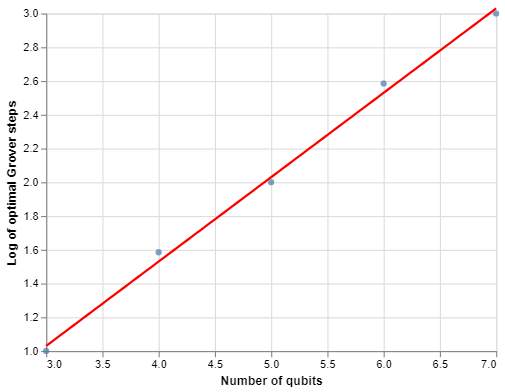